In [33]:
import logging
import os
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import rmsprop


In [2]:
from GenreFeatureData import (
    GenreFeatureData,
)

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)

genre_features = GenreFeatureData()

# if all of the preprocessed files do not exist, regenerate them all for self-consistency
if (
    os.path.isfile(genre_features.train_X_preprocessed_data)
    and os.path.isfile(genre_features.train_Y_preprocessed_data)
    and os.path.isfile(genre_features.dev_X_preprocessed_data)
    and os.path.isfile(genre_features.dev_Y_preprocessed_data)
    and os.path.isfile(genre_features.test_X_preprocessed_data)
    and os.path.isfile(genre_features.test_Y_preprocessed_data)
):
    print("Preprocessed files exist, deserializing npy files")
    genre_features.load_deserialize_data()
else:
    print("Preprocessing raw audio files")
    genre_features.load_preprocess_data()

print("Training X shape: " + str(genre_features.train_X.shape))
print("Training Y shape: " + str(genre_features.train_Y.shape))
print("Dev X shape: " + str(genre_features.dev_X.shape))
print("Dev Y shape: " + str(genre_features.dev_Y.shape))
print("Test X shape: " + str(genre_features.test_X.shape))
print("Test Y shape: " + str(genre_features.test_Y.shape))

Preprocessed files exist, deserializing npy files
Training X shape: (420, 128, 33)
Training Y shape: (420, 8)
Dev X shape: (120, 128, 33)
Dev Y shape: (120, 8)
Test X shape: (60, 128, 33)
Test Y shape: (60, 8)


In [5]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 35  # num of training examples per minibatch
num_epochs = 400
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_lstm.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

00
420/420 [==============================] - 3s 8ms/step - loss: 0.3980 - accuracy: 0.8548
Epoch 211/400
420/420 [==============================] - 4s 8ms/step - loss: 0.4226 - accuracy: 0.8524
Epoch 212/400
420/420 [==============================] - 3s 8ms/step - loss: 0.4022 - accuracy: 0.8595
Epoch 213/400
420/420 [==============================] - 4s 9ms/step - loss: 0.3829 - accuracy: 0.8619
Epoch 214/400
420/420 [==============================] - 4s 8ms/step - loss: 0.4210 - accuracy: 0.8595
Epoch 215/400
420/420 [==============================] - 4s 9ms/step - loss: 0.4418 - accuracy: 0.8524
Epoch 216/400
420/420 [==============================] - 4s 9ms/step - loss: 0.4506 - accuracy: 0.8452
Epoch 217/400
420/420 [==============================] - 4s 10ms/step - loss: 0.3619 - accuracy: 0.8619
Epoch 218/400
420/420 [==============================] - 4s 10ms/step - loss: 0.4480 - accuracy: 0.8429
Epoch 219/400
420/420 [==============================] - 4s 11ms/step - loss: 0.38

dict_keys(['loss', 'accuracy'])


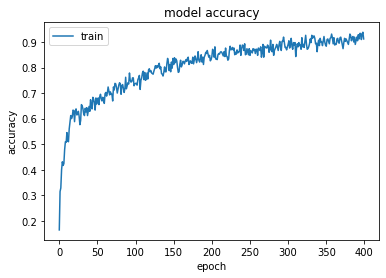

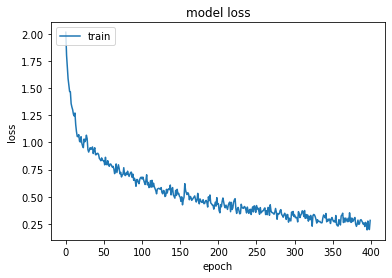

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss')
plt.show()

In [11]:
from keras.models import load_model
model_filename = "lstm_genre_classifier_lstm.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)


Saving model: lstm_genre_classifier_lstm.sav


In [14]:
model_weights_filename = 'lstm_model_weights.h5'
print('\nSaving weights: '+ model_weights_filename)
model.save_weights(model_weights_filename)


Saving weights: lstm_model_weights.h5


In [4]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 70  # num of training examples per minibatch
num_epochs = 800
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_2.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

racy: 0.9571
Epoch 610/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1834 - accuracy: 0.9476
Epoch 611/800
420/420 [==============================] - 3s 8ms/step - loss: 0.1528 - accuracy: 0.9452
Epoch 612/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1451 - accuracy: 0.9476
Epoch 613/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1789 - accuracy: 0.9381
Epoch 614/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1668 - accuracy: 0.9595
Epoch 615/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1662 - accuracy: 0.9476
Epoch 616/800
420/420 [==============================] - 3s 8ms/step - loss: 0.1336 - accuracy: 0.9571
Epoch 617/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1538 - accuracy: 0.9429
Epoch 618/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1190 - accuracy: 0.9619
Epoch 619/800
420/420 [==============================] - 3s 

dict_keys(['loss', 'accuracy'])


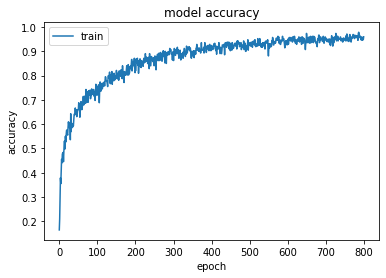

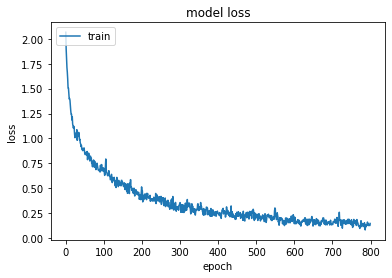

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy_2')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss_2')
plt.show()

In [6]:
model_weights_filename = 'lstm_model_2_weights.h5'
print('\nSaving weights: '+ model_weights_filename)
model.save_weights(model_weights_filename)


Saving weights: lstm_model_2_weights.h5


In [25]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
model.add(Dense(32, activation='relu', input_dim=100))
model.add(BatchNormalization())
model.add(LSTM(units=128, return_sequences=True ))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', input_dim=100))
model.add(BatchNormalization())
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = Adam()
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 15  # num of training examples per minibatch
num_epochs = 800
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_3.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

- 12s 28ms/step - loss: 0.3237 - accuracy: 0.9024
Epoch 614/800
420/420 [==============================] - 12s 28ms/step - loss: 0.3242 - accuracy: 0.8952
Epoch 615/800
420/420 [==============================] - 12s 28ms/step - loss: 0.3251 - accuracy: 0.8976
Epoch 616/800
420/420 [==============================] - 12s 27ms/step - loss: 0.4584 - accuracy: 0.8667
Epoch 617/800
420/420 [==============================] - 12s 28ms/step - loss: 0.3202 - accuracy: 0.9024
Epoch 618/800
420/420 [==============================] - 12s 28ms/step - loss: 0.3948 - accuracy: 0.8667
Epoch 619/800
420/420 [==============================] - 12s 28ms/step - loss: 0.3060 - accuracy: 0.9000
Epoch 620/800
420/420 [==============================] - 12s 28ms/step - loss: 0.2628 - accuracy: 0.9071
Epoch 621/800
420/420 [==============================] - 12s 28ms/step - loss: 0.2729 - accuracy: 0.9000
Epoch 622/800
420/420 [==============================] - 12s 28ms/step - loss: 0.2987 - accuracy: 0.9000
Epoch

dict_keys(['loss', 'accuracy'])


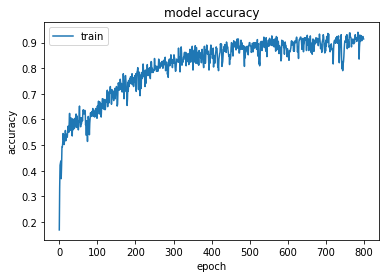

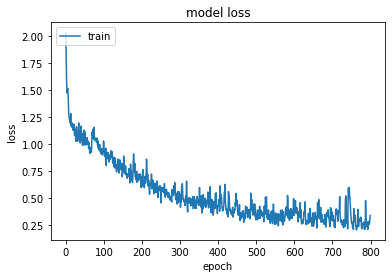

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy_3')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss_3')
plt.show()

In [27]:
# Save the weights
model.save_weights('lstm_3_model_weights.h5')

# Save the model architecture
with open('lstm_model_architecture.json', 'w') as f:
    f.write(model.to_json())

In [ ]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_architecture.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_weights.h5')

In [ ]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')

# Deletes the existing model
del model  

# Returns a compiled model identical to the previous one
model = load_model('my_model.h5')
# this allows you to work from the model directly and continuing training from the state it left off. 

In [34]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = rmsprop()
model.compile(loss="categorical_crossentropy", 
              optimizer=opt, 
              metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 16  # num of training examples per minibatch
num_epochs = 800
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_4.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

ss: 0.1249 - accuracy: 0.9595
Epoch 612/800
420/420 [==============================] - 6s 13ms/step - loss: 0.1233 - accuracy: 0.9619
Epoch 613/800
420/420 [==============================] - 6s 14ms/step - loss: 0.1587 - accuracy: 0.9381
Epoch 614/800
420/420 [==============================] - 6s 14ms/step - loss: 0.1894 - accuracy: 0.9333
Epoch 615/800
420/420 [==============================] - 6s 14ms/step - loss: 0.1490 - accuracy: 0.9500
Epoch 616/800
420/420 [==============================] - 5s 13ms/step - loss: 0.1587 - accuracy: 0.9476
Epoch 617/800
420/420 [==============================] - 6s 14ms/step - loss: 0.1668 - accuracy: 0.9476
Epoch 618/800
420/420 [==============================] - 6s 13ms/step - loss: 0.1650 - accuracy: 0.9429
Epoch 619/800
420/420 [==============================] - 6s 14ms/step - loss: 0.1597 - accuracy: 0.9524
Epoch 620/800
420/420 [==============================] - 6s 13ms/step - loss: 0.1635 - accuracy: 0.9452
Epoch 621/800
420/420 [===========

dict_keys(['loss', 'accuracy'])


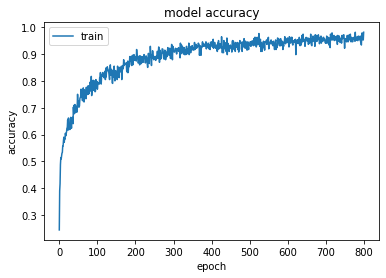

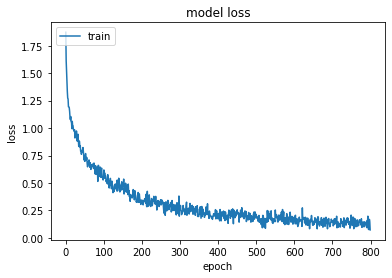

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy_4')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss_4')
plt.show()

In [36]:
# Save the weights
model.save_weights('lstm_4_model_weights.h5')

# Save the model architecture
with open('lstm_model_4_architecture.json', 'w') as f:
    f.write(model.to_json())

In [38]:
input_shape = (genre_features.train_X.shape[1], genre_features.train_X.shape[2])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=True))
model.add(Dense(32, activation='tanh', input_dim=100))
model.add(Dense(32, activation='relu', input_dim=100))
model.add(BatchNormalization())
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=genre_features.train_Y.shape[1], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = rmsprop()
model.compile(loss="categorical_crossentropy", 
              optimizer=opt, 
              metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 15  # num of training examples per minibatch
num_epochs = 400
history = model.fit(
    genre_features.train_X,
    genre_features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

print("\nValidating ...")
score, accuracy = model.evaluate(
    genre_features.dev_X, genre_features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    genre_features.test_X, genre_features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


model_filename = "lstm_genre_classifier_5.sav"
print("\nSaving model: " + model_filename)
model.save(model_filename)

s: 0.4586 - accuracy: 0.8357
Epoch 212/400
420/420 [==============================] - 8s 20ms/step - loss: 0.5161 - accuracy: 0.8048
Epoch 213/400
420/420 [==============================] - 8s 19ms/step - loss: 0.4585 - accuracy: 0.8429
Epoch 214/400
420/420 [==============================] - 8s 20ms/step - loss: 0.4506 - accuracy: 0.8190
Epoch 215/400
420/420 [==============================] - 8s 20ms/step - loss: 0.5144 - accuracy: 0.8167
Epoch 216/400
420/420 [==============================] - 8s 20ms/step - loss: 0.4880 - accuracy: 0.8238
Epoch 217/400
420/420 [==============================] - 8s 20ms/step - loss: 0.4909 - accuracy: 0.8405
Epoch 218/400
420/420 [==============================] - 8s 19ms/step - loss: 0.4785 - accuracy: 0.8262
Epoch 219/400
420/420 [==============================] - 8s 20ms/step - loss: 0.4934 - accuracy: 0.8310
Epoch 220/400
420/420 [==============================] - 8s 20ms/step - loss: 0.4733 - accuracy: 0.8214
Epoch 221/400
420/420 [============

dict_keys(['loss', 'accuracy'])


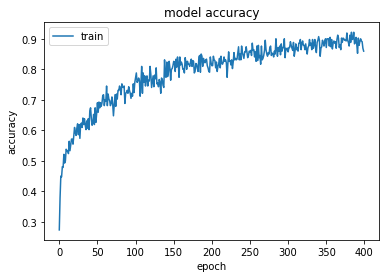

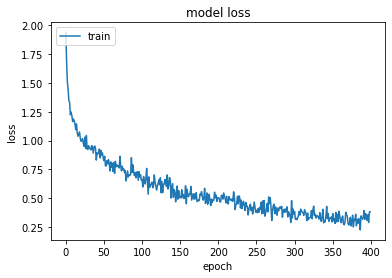

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_accuracy_5')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('LSTM_training_loss_5')
plt.show()

In [40]:
# Save the weights
model.save_weights('lstm_5_model_weights.h5')

# Save the model architecture
with open('lstm_model_5_architecture.json', 'w') as f:
    f.write(model.to_json())

In [41]:
from keras.models import load_model

# Creates a HDF5 file 'my_model.h5'
model.save('lstm_model_5.h5')